In [97]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [98]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [99]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [100]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [101]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [102]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [103]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [104]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [105]:
# Inspect
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [106]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [107]:
# Find the most recent date in the data set.
start_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
start_date

('2017-08-23',)

In [108]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
precipitation_12 = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date >= '2016-08-24').filter(Measurement.date <= '2017-08-23').order_by(Measurement.date).all()

#Display
precipitation_12

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [109]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
precipitation_12_df = pd.DataFrame(precipitation_12, columns=['date', 'precipitation'])
precipitation_12_df.set_index('date')
precipitation_12_df.sort_values(by=['date'])
precipitation_12_df.head()

,date,precipitation
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


In [110]:
# precipitation_12_df["date"]=pd.to_datetime(precipitation_12_df["date"])
# precipitation_12_df.head()
# precipitation_12_df["date"].dtypes

In [118]:
precipitation_12_df
precipitation_12_df['date'] = pd.to_datetime(precipitation_12_df['date'])
precipitation_12_df["date"].dtypes

dtype('<M8[ns]')

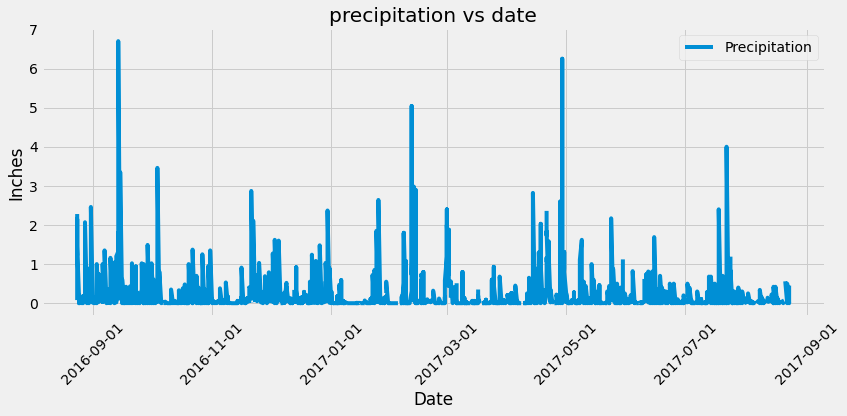

In [130]:
from datetime import datetime as dt
from matplotlib import pyplot as plt, dates as mdates

plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.autolayout"] = True


x_values = precipitation_12_df["date"]
y_values = precipitation_12_df["precipitation"]
ax = plt.gca()

formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.MonthLocator(interval=2)
ax.xaxis.set_major_locator(locator)
plt.plot(x_values, y_values)
plt.title("precipitation vs date")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Inches")
plt.legend(["Precipitation"])
# #plt.savefig('precipitation vs date')
plt.show()

In [121]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_12_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [122]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Station.id).count()
station_count

9

In [123]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [124]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#The most active station is USC00519281
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

<function matplotlib.pyplot.show(close=None, block=None)>

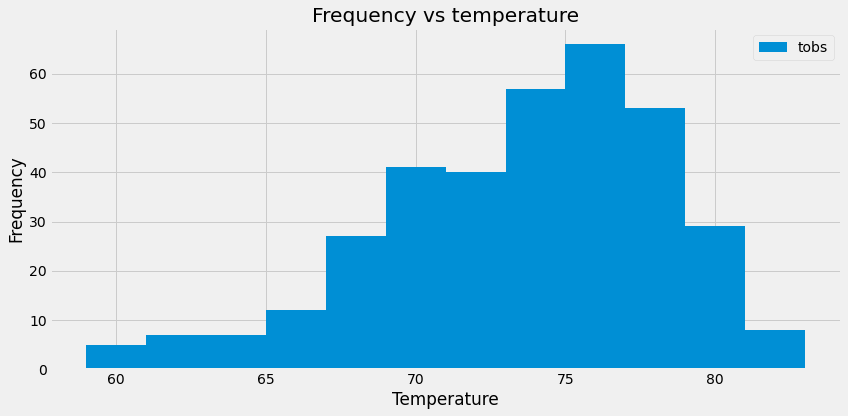

In [131]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= '2016-08-23').all()

# Plot the results as a histogram
station_high_temp_obs = pd.DataFrame(results, columns=['tobs'])
station_high_temp_obs.plot.hist(bins=12)
plt.tight_layout()
plt.title("Frequency vs temperature")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show

# Close session

In [132]:
# Close Session
session.close()